In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load("mnist.npz")

In [3]:
X_train = data["x_train"]
y_train = data["y_train"]
X_test = data["x_test"]
y_test = data["y_test"]

X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

num_classes = 10

def one_hot(y, num_classes):
    encoded = np.zeros((y.size, num_classes))
    encoded[np.arange(y.size), y] = 1
    return encoded

y_train_oh = one_hot(y_train, num_classes)
y_test_oh = one_hot(y_test, num_classes)

In [4]:
np.random.seed(42)
input_size = 784
hidden_size = 256
output_size = 10
learning_rate = 0.1
epochs = 100

W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

In [5]:
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return Z > 0

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return expZ / np.sum(expZ, axis=1, keepdims=True)

In [6]:
def forward(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

In [7]:
def cross_entropy(y_true, y_pred):
    epsilon = 1e-9
    return -np.mean(np.sum(y_true * np.log(y_pred + epsilon), axis=1))

def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

In [8]:
def backward(X, y_true, Z1, A1, A2):
    global W1, b1, W2, b2

    m = X.shape[0]

    dZ2 = A2 - y_true
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)

    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

In [9]:
losses = []
accuracies = []

for epoch in range(epochs):
    Z1, A1, Z2, A2 = forward(X_train)

    loss = cross_entropy(y_train_oh, A2)
    acc = accuracy(y_train_oh, A2)

    backward(X_train, y_train_oh, Z1, A1, A2)

    losses.append(loss)
    accuracies.append(acc)

    print(f"Epoch {epoch+1}/{epochs} | Loss: {loss:.4f} | Accuracy: {acc:.4f}")

_, _, _, test_preds = forward(X_test)
test_accuracy = accuracy(y_test_oh, test_preds)

print("\nTest Accuracy:", test_accuracy)

Epoch 1/100 | Loss: 2.3036 | Accuracy: 0.1147
Epoch 2/100 | Loss: 2.3013 | Accuracy: 0.1502
Epoch 3/100 | Loss: 2.2990 | Accuracy: 0.1994
Epoch 4/100 | Loss: 2.2967 | Accuracy: 0.2604
Epoch 5/100 | Loss: 2.2944 | Accuracy: 0.3214
Epoch 6/100 | Loss: 2.2920 | Accuracy: 0.3744
Epoch 7/100 | Loss: 2.2895 | Accuracy: 0.4199
Epoch 8/100 | Loss: 2.2869 | Accuracy: 0.4545
Epoch 9/100 | Loss: 2.2842 | Accuracy: 0.4814
Epoch 10/100 | Loss: 2.2813 | Accuracy: 0.5030
Epoch 11/100 | Loss: 2.2783 | Accuracy: 0.5216
Epoch 12/100 | Loss: 2.2751 | Accuracy: 0.5389
Epoch 13/100 | Loss: 2.2716 | Accuracy: 0.5514
Epoch 14/100 | Loss: 2.2679 | Accuracy: 0.5625
Epoch 15/100 | Loss: 2.2640 | Accuracy: 0.5722
Epoch 16/100 | Loss: 2.2597 | Accuracy: 0.5794
Epoch 17/100 | Loss: 2.2552 | Accuracy: 0.5864
Epoch 18/100 | Loss: 2.2503 | Accuracy: 0.5920
Epoch 19/100 | Loss: 2.2451 | Accuracy: 0.5964
Epoch 20/100 | Loss: 2.2395 | Accuracy: 0.6005
Epoch 21/100 | Loss: 2.2335 | Accuracy: 0.6041
Epoch 22/100 | Loss: 2

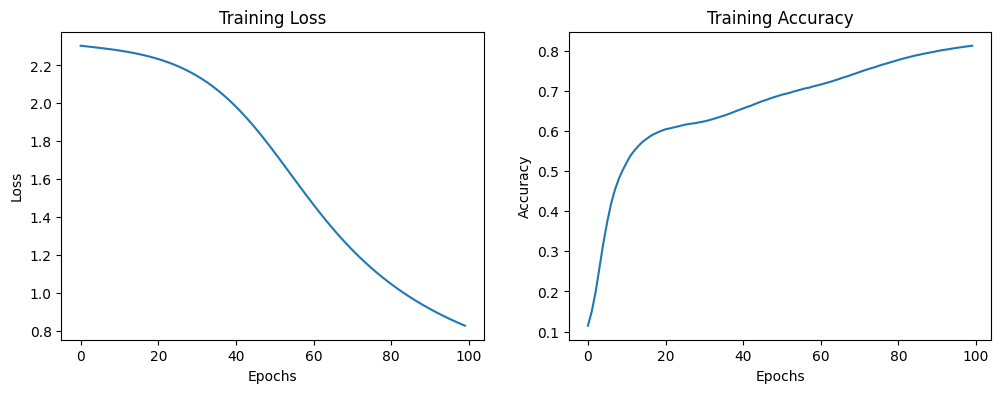

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.show()

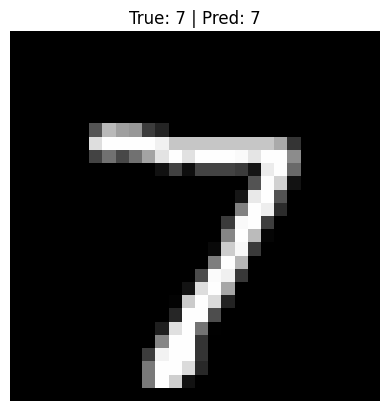

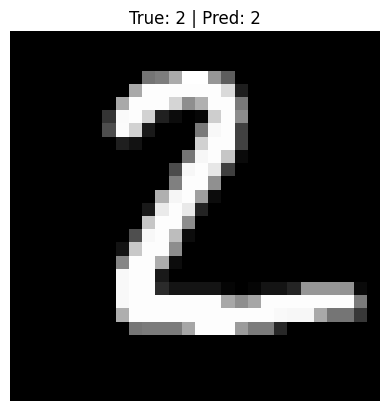

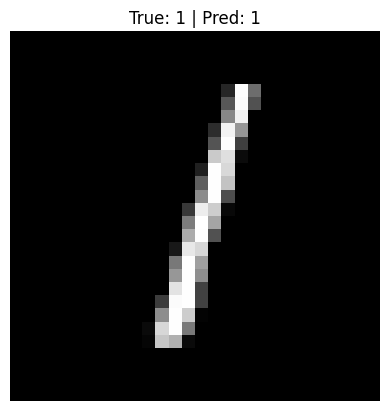

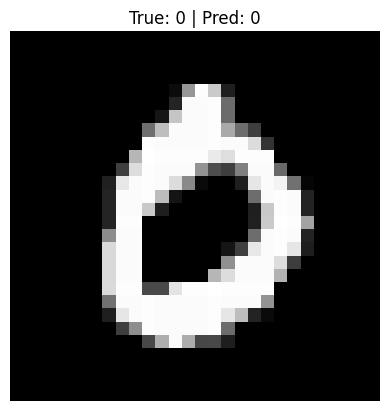

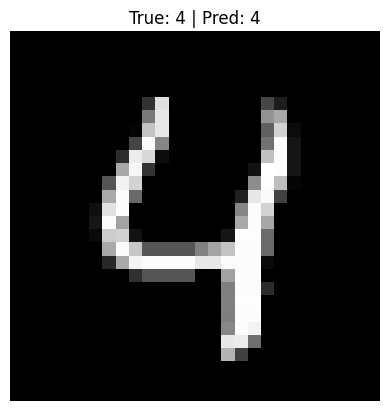

In [11]:
def visualize_predictions(X, y_true, y_pred, n=5):
    for i in range(n):
        plt.imshow(X[i].reshape(28, 28), cmap="gray")
        plt.title(f"True: {y_true[i]} | Pred: {np.argmax(y_pred[i])}")
        plt.axis("off")
        plt.show()

visualize_predictions(X_test, y_test, test_preds)